## Download all alpha protein proteins in SCOP from PDB

In [5]:
import pandas as pd
import numpy as np
import os
data_dir_path = os.getcwd()

file_name_list = ['rcsb_pdb_sequence_4c70b7ad43c9664b131d11b224d63b4f_00001-02500.csv', 'rcsb_pdb_sequence_4c70b7ad43c9664b131d11b224d63b4f_02501-05000.csv',
             'rcsb_pdb_sequence_4c70b7ad43c9664b131d11b224d63b4f_05001-07500.csv', 'rcsb_pdb_sequence_4c70b7ad43c9664b131d11b224d63b4f_07501-10000.csv',
             'rcsb_pdb_sequence_4c70b7ad43c9664b131d11b224d63b4f_10001-12500.csv', 'rcsb_pdb_sequence_4c70b7ad43c9664b131d11b224d63b4f_12501-15000.csv',
             'rcsb_pdb_sequence_4c70b7ad43c9664b131d11b224d63b4f_15001-17500.csv', 'rcsb_pdb_sequence_4c70b7ad43c9664b131d11b224d63b4f_17501-19119.csv']

for idx, file_name in enumerate(file_name_list):
    file_path = data_dir_path + '/original_data/' + file_name
    file_df = pd.read_csv(file_path, header = 1)
    file_df = file_df.dropna(subset=["Entry ID"])
    if idx == 0:
        all_df = file_df
    else:
        all_df = pd.concat([all_df,file_df])

all_df.to_csv(data_dir_path + '/all_alpha(origi).csv', encoding='utf-8')

## Divide the sequence dataset into test set and training set
- Removal of duplicate sequences and removal of non-protein elements from 19,119 sequences in all_alpha(clean).csv
- Removal of sequences containing nonstandard amino acids
- Divided into training set and test set 80%, 20% respectively

## RES
* all:  9168
* train:  7334
* test:  1834

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os
data_dir_path = os.getcwd()

def has_non_standard_amino_acid(seq):
    standard_amino_acids = 'ACDEFGHIKLMNPQRSTVWY'  # Amino Acid Residue Alphabets
    return all(aa in standard_amino_acids for aa in seq)

df = pd.read_csv(data_dir_path + '/all_alpha(origin).csv', index_col=False)
df = df[df['Sequence'].apply(has_non_standard_amino_acid)]
df.drop_duplicates(subset=['Sequence'], keep='first', inplace=True)    # Remove duplicate rows
df = df[df['Entity Macromolecule Type'] != 'polydeoxyribonucleotide']    # Exclusion of non-protein entities characterized by polydeoxyribonucleotide composition

x = df.iloc[:]
y = [0 for i in range(len(x))]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print('all: ',len(df))
print('train: ', len(X_train))
print('test: ', len(X_test))
df.to_csv(data_dir_path + '/all_alpha(clean).csv', encoding='utf-8')
X_train.to_csv(data_dir_path + '/train_alpha.csv', encoding='utf-8')
X_test.to_csv(data_dir_path + '/test_alpha.csv', encoding='utf-8')

all:  9168
train:  7334
test:  1834


## Analysis of Protein Length and Amino Acid Distribution

max 2413 min 3
max 2363 min 9


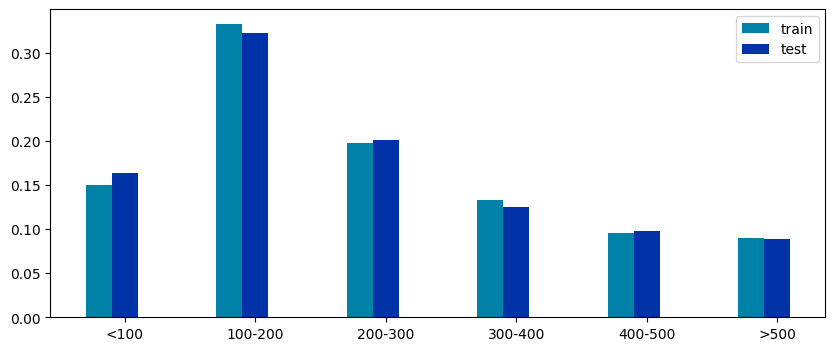

In [4]:
import os
import pandas as pd
data_dir_path = os.getcwd()

train_df = pd.read_csv(data_dir_path + '/train_alpha.csv')
test_df = pd.read_csv(data_dir_path + '/test_alpha.csv')
train_len_list = [len(train_df.iloc[i]['Sequence']) for i in range(len(train_df))]
test_len_list = [len(test_df.iloc[i]['Sequence']) for i in range(len(test_df))]

print('max', max(train_len_list), 'min', min(train_len_list))
print('max', max(test_len_list), 'min', min(test_len_list))

def get_seq_len_distri(len_list):
    len_count = {'<100':0, '100-200':0, '200-300':0, '300-400':0, '400-500':0, '>500':0}
    len_count_rate = {'<100':0, '100-200':0, '200-300':0, '300-400':0, '400-500':0, '>500':0}
    x = 0
    for len_num in len_list:
        if len_num < 100:
            len_count['<100'] += 1
        elif 100 < len_num < 200:
            len_count['100-200'] += 1
        elif 200 < len_num < 300:
            len_count['200-300'] += 1
        elif 300 < len_num < 400:
            len_count['300-400'] += 1
        elif 400 < len_num < 500:
            len_count['400-500'] += 1
        else:
            len_count['>500'] += 1
    for length in len_count.keys():
        r = len_count[length] / sum(list(len_count.values()))
        len_count_rate[length]= r
    return len_count_rate

import matplotlib.pyplot as plt
import numpy as np

train_len_count = get_seq_len_distri(train_len_list)
test_len_count = get_seq_len_distri(test_len_list)

seq_len = list(train_len_count.keys())
train_len_count_y = list(train_len_count.values())
test_len_count_y = list(test_len_count.values())

fig = plt.figure(figsize=(10,4))
x = np.arange(len(seq_len))

plt.bar(x, train_len_count_y, width=0.2, color='#0081a7', label='train', tick_label=seq_len)
plt.bar(x+0.2, test_len_count_y, width=0.2, color='#0232a7', label='test', tick_label=seq_len)
plt.legend()
plt.title("")
plt.show()

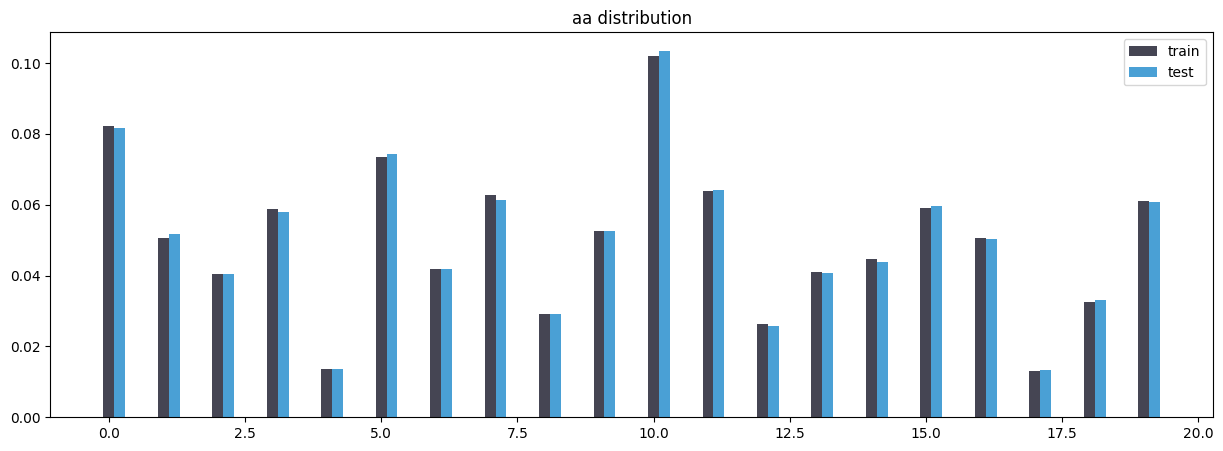

In [5]:
train_df = pd.read_csv(data_dir_path + '/train_alpha.csv')
test_df = pd.read_csv(data_dir_path + '/test_alpha.csv')
train_seq_list = [train_df.iloc[i]['Sequence'] for i in range(len(train_df))]
test_seq_list = [test_df.iloc[i]['Sequence'] for i in range(len(test_df))]

def count_seq_aa_distri(seq_list):
    aa_dict = {'A':0, 'R':0, 'N':0, 'D':0, 'C':0, 'E':0, 'Q':0, 'G':0, 'H':0, 'I':0, 'L':0, 'K':0, 'M':0, 'F':0, 'P':0, 'S':0, 'T':0, 'W':0, 'Y':0, 'V':0}
    aa_rate_dict = {'A':0, 'R':0, 'N':0, 'D':0, 'C':0, 'E':0, 'Q':0, 'G':0, 'H':0, 'I':0, 'L':0, 'K':0, 'M':0, 'F':0, 'P':0, 'S':0, 'T':0, 'W':0, 'Y':0, 'V':0}

    for seq in seq_list:
        for aa in seq:
            aa_dict[aa] += 1
    for aa in aa_dict.keys():
        aa_rate = aa_dict[aa] / sum(list(aa_dict.values()))
        aa_rate_dict[aa] = aa_rate
    return aa_rate_dict

test_aa_rate_dict = count_seq_aa_distri(test_seq_list)
train_aa_rate_dict = count_seq_aa_distri(train_seq_list)

import matplotlib.pyplot as plt
import numpy as np

class_name = list(test_aa_rate_dict.keys())
fig = plt.figure(figsize=(15, 5))
x = np.arange(len(class_name))
plt.bar(x, list(train_aa_rate_dict.values()), width=0.2,color='#454553', label='train')
plt.bar(x+0.2, list(test_aa_rate_dict.values()), width=0.2, color='#4AA0D5', label='test')


plt.legend()
plt.title("aa distribution")
plt.show()

## Generate sequences exhibiting amino acid compositions in accordance with the distribution observed in the training sequence

In [6]:
# Statistical distribution of amino acids in the training set sequences
import pandas as pd
import os
data_dir_path = os.getcwd()

alpha_data_path = data_dir_path + '/train_alpha.csv'
alpha_df = pd.read_csv(alpha_data_path)
seq_list = [alpha_df.iloc[i]['Sequence'] for i in range(len(alpha_df))]
len_list = [len(seq) for seq in seq_list]

amino_acids = ['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']
amino_acids_count = {'A':0, 'R':0, 'N':0, 'D':0, 'C':0, 'E':0, 'Q':0, 'G':0, 'H':0, 'I':0, 'L':0, 'K':0, 'M':0, 'F':0, 'P':0, 'S':0, 'T':0, 'W':0, 'Y':0, 'V':0}
amino_acids_rate = {'A':0, 'R':0, 'N':0, 'D':0, 'C':0, 'E':0, 'Q':0, 'G':0, 'H':0, 'I':0, 'L':0, 'K':0, 'M':0, 'F':0, 'P':0, 'S':0, 'T':0, 'W':0, 'Y':0, 'V':0}
for seq in seq_list:
    for aa in seq:
        if aa not in amino_acids:
            continue
        amino_acids_count[aa] += 1

for aa in amino_acids_count.keys():
    amino_acids_rate[aa]  = amino_acids_count[aa] / sum(list(amino_acids_count.values()))

In [7]:
import random
import numpy as np

amino_acids = ['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']
amino_acid_distribution = list(amino_acids_rate.values())

seq_num = 2000
random_seq_list = list()
for i in range(seq_num):
    sequence_length = random.randint(200, 500)
    random_sequence = random.choices(amino_acids, weights=amino_acid_distribution, k=sequence_length)
    random_sequence = ''.join(random_sequence)
    random_seq_list.append(random_sequence)
np.save(data_dir_path + '/random_seq2000.npy', random_seq_list)